In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

In [2]:
data = pd.read_csv("coursework_other.csv", encoding= 'unicode_escape')

In [3]:
data.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
data.shape

(8760, 14)

In [7]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
#predict column Rented Bike Count
X = data.drop(['Rented Bike Count'], axis=1)
y = data['Rented Bike Count']

In [9]:
#convert category data in to numberical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['Date'] = le.fit_transform(X['Date'])
X['Seasons'] = le.fit_transform(X['Seasons'])
X['Holiday'] = le.fit_transform(X['Holiday'])
X['Functioning Day'] = le.fit_transform(X['Functioning Day'])

In [10]:
X.head(5)

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,11,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,11,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,11,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,11,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [11]:
#split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44, shuffle=True)

## Using base line

In [12]:
from sklearn.dummy import DummyRegressor

In [13]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

DummyRegressor()

In [14]:
pred_train_dummy = dummy_regr.predict(X_train)
pred_test_dummy = dummy_regr.predict(X_test)
print(f'mean square error on train set: {mean_squared_error(y_train, pred_train_dummy)}')
print(f'mean square error on test set: {mean_squared_error(y_test, pred_test_dummy)}')

mean square error on train set: 416294.4156070289
mean square error on test set: 414728.310905626


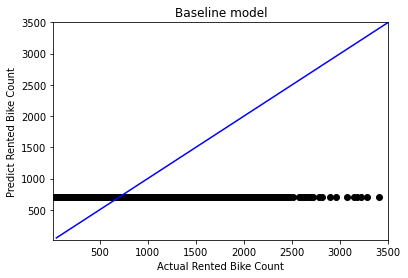

In [15]:
plt.scatter(y_test,pred_test_dummy,color='black') 
x = np.linspace(50,3500,100)
y=x
plt.plot(x, y,color='blue')
plt.ylim(20,3500)
plt.xlim(20, 3500)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predict Rented Bike Count')
plt.title('Baseline model')
plt.show()

In [16]:
#use cross validation for tuning hyper parameter
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=44, shuffle=True)

## using KNN

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
#tuning n only
max_n = 20
train_mse = [[] for _ in range(max_n)]
val_mse = [[] for _ in range(max_n)]

for n in range(max_n):
    knn = KNeighborsRegressor(n_neighbors=n+1)
    
    #Loop over cross-validation splits
    for train_index, val_index in kf.split(X_train):
        Xtrain, Xval = X_train.values[train_index], X_train.values[val_index]
        ytrain, yval = y_train.values[train_index], y_train.values[val_index]
        
        #Fit the classifier on Xtrain and Ytrain
        knn.fit(Xtrain, ytrain)
        
        #Make predictions on Xtrain, Xval
        pred_train = knn.predict(Xtrain)
        pred_val = knn.predict(Xval)
        
        #Calculate the mse of the predictions
        train_mse[n].append(mean_squared_error(ytrain, pred_train))
        val_mse[n].append(mean_squared_error(yval, pred_val))

In [25]:
train_mse_mean = np.mean(train_mse, axis=1)
val_mse_mean = np.mean(val_mse, axis=1)

In [26]:
n = np.argmin(val_mse_mean)+1
print(f'min mse validation{np.round(min(val_mse_mean),2)} at n = {n}')

min mse 242825.88 at n = 7


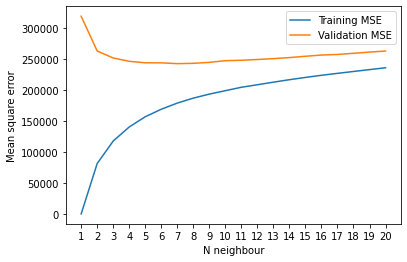

In [27]:
plt.figure()
x = list(range(1,max_n+1))
plt.plot(x,train_mse_mean, label = 'Training MSE')
plt.plot(x,val_mse_mean, label = 'Validation MSE')
plt.xlabel('N neighbour')
plt.ylabel('Mean square error')
plt.xticks(x)
plt.legend()

In [28]:
#tuning weights only
weights = ['uniform', 'distance']
train_mse = [[] for _ in range(len(weights))]
val_mse = [[] for _ in range(len(weights))]

for n in range(len(weights)):
    knn = KNeighborsRegressor(weights=weights[n])
    
    #Loop over cross-validation splits
    for train_index, val_index in kf.split(X_train):
        Xtrain, Xval = X_train.values[train_index], X_train.values[val_index]
        ytrain, yval = y_train.values[train_index], y_train.values[val_index]
        
        #Fit the classifier on Xtrain and Ytrain
        knn.fit(Xtrain, ytrain)
        
        #Make predictions on Xtrain, Xval
        pred_train = knn.predict(Xtrain)
        pred_val = knn.predict(Xval)
        
        #Calculate the mse of the predictions
        train_mse[n].append(mean_squared_error(ytrain, pred_train))
        val_mse[n].append(mean_squared_error(yval, pred_val))

train_mse_mean = np.mean(train_mse, axis=1)
val_mse_mean = np.mean(val_mse, axis=1)

print(f'mse train uniform : {np.round(train_mse_mean[0],2)} , distance : {np.round(train_mse_mean[1],2)}')
print(f'mse validation uniform : {np.round(val_mse_mean[0],2)} , distance : {np.round(val_mse_mean[1],2)}')

mse train uniform : 156972.2 , distance : 0.0
mse validation uniform : 244186.01 , distance : 226660.54


In [29]:
#use grid search CV method
from sklearn.model_selection import GridSearchCV
n = np.arange(2,21,1)
params = {'n_neighbors':n,
          'weights':['uniform', 'distance']
         }

knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [30]:
#test model on test set
knn_optimal = KNeighborsRegressor(n_neighbors=7,weights='distance')
knn_optimal.fit(X_train, y_train)
pred_train = knn_optimal.predict(X_train)
pred_test = knn_optimal.predict(X_test)
print(f'mean square error on train set: {mean_squared_error(y_train, pred_train)}')
print(f'mean square error on test set: {mean_squared_error(y_test, pred_test)}')

mean square error on train set: 0.0
mean square error on test set: 204664.94447940466


In [31]:
print(f'r square on test set: {r2_score(y_test, pred_test)}')

r square on test set: 0.5063014794943843


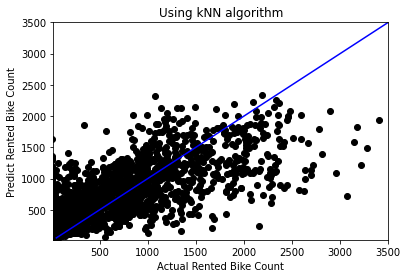

In [32]:
plt.figure()
plt.scatter(y_test,pred_test,color='black') 
x = np.linspace(50,3500,100)
y=x
plt.plot(x, y,color='blue')
plt.ylim(20, 3500)
plt.xlim(20, 3500)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predict Rented Bike Count')
plt.title('Using kNN algorithm')
plt.show()

## using Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

### tuning hyper parameter max_depth

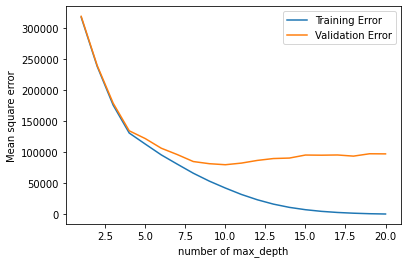

In [34]:
max_d = 20
mean_trn_mses = []
mean_val_mses = []
for d in range(max_d):
    trn_mses=[]
    val_mses=[]
    rtdb = DecisionTreeRegressor(max_depth=d+1)
    for train_index, val_index in kf.split(X_train):
        Xtrain, Xval = X_train.values[train_index], X_train.values[val_index]
        ytrain, yval = y_train.values[train_index], y_train.values[val_index]
        rtdb.fit(Xtrain, ytrain)
        ytrn_pred = rtdb.predict(Xtrain)
        yval_pred = rtdb.predict(Xval)
        trn_mses.append(mean_squared_error(ytrain, ytrn_pred))
        val_mses.append(mean_squared_error(yval, yval_pred))
    mean_trn_mses.append(np.mean(trn_mses))
    mean_val_mses.append(np.mean(val_mses))

plt.plot(range(1, max_d+1), mean_trn_mses, label='Training Error')
plt.plot(range(1, max_d+1), mean_val_mses, label='Validation Error')
plt.xlabel('number of max_depth')
plt.ylabel('Mean square error')
plt.legend()
plt.show()

In [35]:
d = np.argmin(mean_val_mses)+1
d

10

### tuning hyper parameter max_leaf_nodes

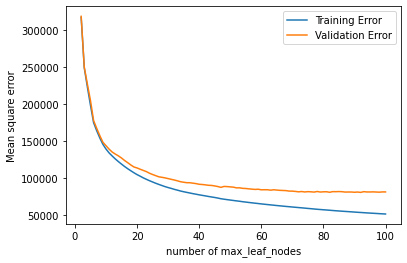

In [36]:
max_l = 100
mean_trn_mses = []
mean_val_mses = []
for l in range(1,max_l):
    trn_mses=[]
    val_mses=[]
    rtdb = DecisionTreeRegressor(max_leaf_nodes=l+1)
    for train_index, val_index in kf.split(X_train):
        Xtrain, Xval = X_train.values[train_index], X_train.values[val_index]
        ytrain, yval = y_train.values[train_index], y_train.values[val_index]
        rtdb.fit(Xtrain, ytrain)
        ytrn_pred = rtdb.predict(Xtrain)
        yval_pred = rtdb.predict(Xval)
        trn_mses.append(mean_squared_error(ytrain, ytrn_pred))
        val_mses.append(mean_squared_error(yval, yval_pred))
    mean_trn_mses.append(np.mean(trn_mses))
    mean_val_mses.append(np.mean(val_mses))

plt.plot(range(2, max_l+1), mean_trn_mses, label='Training Error')
plt.plot(range(2, max_l+1), mean_val_mses, label='Validation Error')
plt.xlabel('number of max_leaf_nodes')
plt.ylabel('Mean square error')
plt.legend()
plt.show()

### using grid search

In [40]:
f = len(X_train.columns)
params = {'max_depth':np.arange(1,21,1),
          'max_leaf_nodes':np.arange(2,50,1)
         }

rtdb = DecisionTreeRegressor()
model = GridSearchCV(rtdb, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'max_depth': 12, 'max_leaf_nodes': 49}

In [41]:
max_depth = model.best_params_['max_depth']
max_leaf_nodes =  model.best_params_['max_leaf_nodes']
rtdb_optimal = DecisionTreeRegressor(max_depth=max_depth ,
                                     max_leaf_nodes= max_leaf_nodes)

#test on test set
rtdb_optimal.fit(X_train, y_train)
pred_train = rtdb_optimal.predict(X_train)
pred_test = rtdb_optimal.predict(X_test)
print(f'mean square error on train set: {mean_squared_error(y_train, pred_train)}')
print(f'mean square error on test set: {mean_squared_error(y_test, pred_test)}')
print(f'r square on test set: {r2_score(y_test, pred_test)}')

mean square error on train set: 73550.42430266776
mean square error on test set: 81665.13157879388
r square on test set: 0.8030050786669812


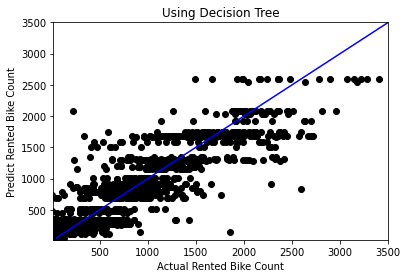

In [42]:
plt.figure()
plt.scatter(y_test,pred_test,color='black') 
x = np.linspace(50,3500,100)
y=x
plt.plot(x, y,color='blue')
plt.ylim(20, 3500)
plt.xlim(20, 3500)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predict Rented Bike Count')
plt.title('Using Decision Tree')
plt.show()